In [2]:
from keras.applications import ResNet50

conv_base = ResNet50(weights='imagenet',
                     include_top=False,
                     input_shape=(200, 200, 3))

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 24,112,513
Trainable params: 24,059,393
Non-trainable params: 53,120
_________________________________________________________________


In [5]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 216


In [6]:
conv_base.trainable = False

In [7]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [10]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_dir = 'Downloads/baby/train'
validation_dir = 'Downloads/baby/validation'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(200, 200),
        batch_size=50,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=50,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=40,
      verbose=2)

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/10
 - 4158s - loss: 0.6670 - acc: 0.5969 - val_loss: 0.9394 - val_acc: 0.5000
Epoch 2/10
 - 3862s - loss: 0.6126 - acc: 0.6671 - val_loss: 1.2897 - val_acc: 0.5000
Epoch 3/10
 - 3842s - loss: 0.5917 - acc: 0.6818 - val_loss: 0.8729 - val_acc: 0.5140
Epoch 4/10
 - 4004s - loss: 0.5822 - acc: 0.6900 - val_loss: 0.6710 - val_acc: 0.6170
Epoch 5/10
 - 4193s - loss: 0.5706 - acc: 0.7074 - val_loss: 0.5964 - val_acc: 0.6790
Epoch 6/10
 - 4115s - loss: 0.5600 - acc: 0.7127 - val_loss: 0.5599 - val_acc: 0.7050
Epoch 7/10
 - 3847s - loss: 0.5560 - acc: 0.7140 - val_loss: 0.5522 - val_acc: 0.7120
Epoch 8/10
 - 3827s - loss: 0.5579 - acc: 0.7129 - val_loss: 0.5460 - val_acc: 0.7240
Epoch 9/10
 - 3831s - loss: 0.5504 - acc: 0.7186 - val_loss: 0.5379 - val_acc: 0.7245
Epoch 10/10
 - 3826s - loss: 0.5410 - acc: 0.7263 - val_loss: 0.5426

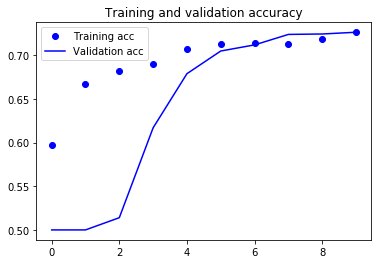

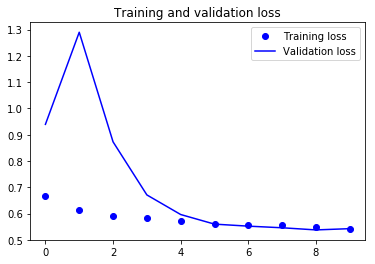

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

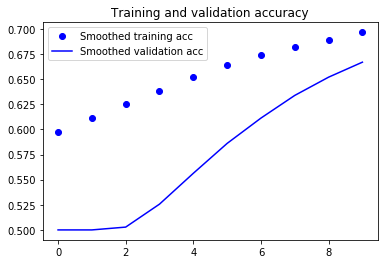

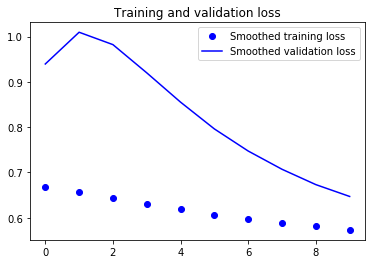

In [13]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
model.save('baby_ResNet50_10')